# Bharat Internship

# TASK - 1: Stock Analysis

In [81]:
# import library files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


In [82]:
# Load csv
df = pd.read_csv('Stock.csv')

In [83]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1


In [84]:
df.shape

(1258, 15)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 147.6+ KB


In [86]:
#Statistical datas
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337148,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [87]:
# check the null values
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [88]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


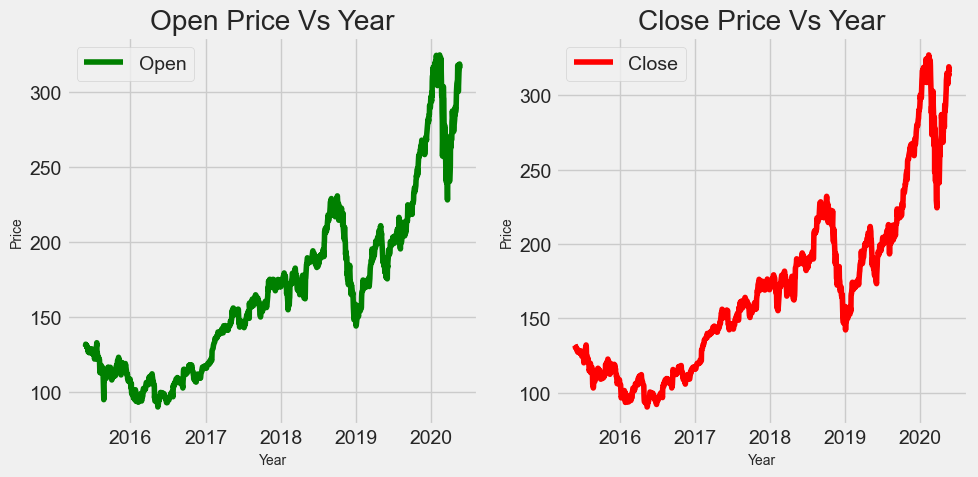

In [89]:
# Create a figure and axes
plt.figure(figsize=(10, 5))

# Plot 'open' prices on the first subplot
plt.subplot(1, 2, 1)
plt.plot(df.index, df['open'], label='Open', color='green')
plt.title("Open Price Vs Year")
plt.xlabel('Year', size=10)
plt.ylabel('Price', size=10)
plt.legend()

# Plot 'close' prices on the second subplot
plt.subplot(1, 2, 2)
plt.plot(df.index, df['close'], label='Close', color='red')
plt.title("Close Price Vs Year")
plt.xlabel('Year', size=10)
plt.ylabel('Price', size=10)
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [90]:
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']
df = df[features]
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1
2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1
2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1


In [91]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0.176074,0.171860,0.173508,0.171857,0.228522,0.152158,0.148554,0.149806,0.148290,0.228522,0.0,0.0
1,0.174956,0.170548,0.177997,0.178333,0.128419,0.151146,0.147365,0.153865,0.154145,0.128419,0.0,0.0
2,0.168623,0.168431,0.172866,0.175649,0.262008,0.145419,0.145446,0.149226,0.151718,0.262008,0.0,0.0
3,0.169699,0.168177,0.173508,0.175521,0.137564,0.146393,0.145216,0.149806,0.151603,0.137564,0.0,0.0
4,0.167272,0.165065,0.170387,0.169812,0.147872,0.144198,0.142396,0.146984,0.146441,0.147872,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.948324,0.951943,0.944305,0.950752,0.149035,0.952867,0.958955,0.948930,0.955260,0.149035,0.0,0.0
1254,0.940640,0.960496,0.955789,0.958676,0.093277,0.945327,0.967366,0.960198,0.963034,0.093277,0.0,0.0
1255,0.966351,0.964730,0.969429,0.965705,0.109478,0.970557,0.971530,0.973581,0.969931,0.109478,0.0,0.0
1256,0.956303,0.970531,0.968018,0.974141,0.094867,0.960697,0.977235,0.972196,0.978207,0.094867,0.0,0.0


In [92]:
# Define the sequence length (number of time steps to look back)
sequence_length = 10

# Generate sequences and labels
sequences = []
labels = []

for i in range(len(df_scaled) - sequence_length):
    seq = df_scaled.iloc[i:i + sequence_length]
    label = df_scaled.iloc[i + sequence_length]
    sequences.append(seq)
    labels.append(label)

X = np.array(sequences)
y = np.array(labels)

X

array([[[0.17607447, 0.17186045, 0.17350778, ..., 0.22852181,
         0.        , 0.        ],
        [0.17495567, 0.17054789, 0.17799726, ..., 0.12841898,
         0.        , 0.        ],
        [0.16862282, 0.16843086, 0.17286643, ..., 0.26200805,
         0.        , 0.        ],
        ...,
        [0.16174111, 0.16097891, 0.16628185, ..., 0.16085966,
         0.        , 0.        ],
        [0.1581525 , 0.15894657, 0.15974004, ..., 0.27387681,
         0.        , 0.        ],
        [0.15654817, 0.15416208, 0.15456644, ..., 0.29642082,
         0.        , 0.        ]],

       [[0.17495567, 0.17054789, 0.17799726, ..., 0.12841898,
         0.        , 0.        ],
        [0.16862282, 0.16843086, 0.17286643, ..., 0.26200805,
         0.        , 0.        ],
        [0.1696994 , 0.16817681, 0.17350778, ..., 0.13756409,
         0.        , 0.        ],
        ...,
        [0.1581525 , 0.15894657, 0.15974004, ..., 0.27387681,
         0.        , 0.        ],
        [0.1

In [93]:
y

array([[0.16271215, 0.15949699, 0.16410125, ..., 0.18380021, 0.        ,
        0.        ],
       [0.1614878 , 0.1630536 , 0.16677356, ..., 0.15929571, 0.        ,
        0.        ],
       [0.1554927 , 0.15522059, 0.16093723, ..., 0.16920898, 0.        ,
        0.        ],
       ...,
       [0.96635143, 0.96473029, 0.96942877, ..., 0.10947829, 0.        ,
        0.        ],
       [0.9563033 , 0.97053095, 0.96801779, ..., 0.09486716, 0.        ,
        0.        ],
       [0.96491598, 0.96350241, 0.96579442, ..., 0.06025227, 0.        ,
        0.        ]])

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
X_train

array([[[0.27847674, 0.27377424, 0.27445699, ..., 0.09831341,
         0.        , 0.        ],
        [0.27163725, 0.28139555, 0.27638105, ..., 0.20037353,
         0.        , 0.        ],
        [0.31626277, 0.3153527 , 0.30254832, ..., 0.32979537,
         0.        , 0.        ],
        ...,
        [0.35421768, 0.35523753, 0.35652087, ..., 0.11188724,
         0.        , 0.        ],
        [0.3402854 , 0.34833601, 0.34577561, ..., 0.13510389,
         0.        , 0.        ],
        [0.33804779, 0.3344483 , 0.33756627, ..., 0.08258798,
         0.8902439 , 0.        ]],

       [[0.88431985, 0.8819121 , 0.86916367, ..., 0.12120183,
         0.        , 0.        ],
        [0.87836697, 0.88589212, 0.88938772, ..., 0.10948783,
         0.        , 0.        ],
        [0.8986321 , 0.90088026, 0.88800239, ..., 0.14404859,
         0.        , 0.        ],
        ...,
        [0.93304061, 0.94770937, 0.94099538, ..., 0.12674555,
         0.        , 0.        ],
        [0.9

In [96]:
X_test

array([[[0.29620873, 0.31810484, 0.30199247, ..., 0.49106301,
         0.        , 0.        ],
        [0.2792789 , 0.30574138, 0.28446212, ..., 0.36281398,
         0.        , 0.        ],
        [0.30689015, 0.30506393, 0.27591072, ..., 0.36636093,
         0.        , 0.        ],
        ...,
        [0.31242084, 0.30942501, 0.30861981, ..., 0.13751079,
         0.        , 0.        ],
        [0.32521321, 0.32123804, 0.31387891, ..., 0.18765802,
         0.        , 0.        ],
        [0.3489403 , 0.34473706, 0.34004618, ..., 0.26018593,
         0.        , 0.        ]],

       [[0.4032762 , 0.41929884, 0.40841457, ..., 0.2025853 ,
         0.        , 0.        ],
        [0.3657857 , 0.38021848, 0.36788096, ..., 0.37431459,
         0.        , 0.        ],
        [0.36494132, 0.37513761, 0.37232769, ..., 0.1310104 ,
         0.        , 0.        ],
        ...,
        [0.37663599, 0.38584978, 0.37724474, ..., 0.20158506,
         0.        , 0.        ],
        [0.3

In [97]:
y_train

array([[0.33391033, 0.33677703, 0.3411151 , ..., 0.06384983, 0.        ,
        0.        ],
       [0.95512117, 0.96261326, 0.96857363, ..., 0.10522771, 0.        ,
        0.        ],
       [0.71388162, 0.71420103, 0.72105353, ..., 0.08202526, 0.93902439,
        0.        ],
       ...,
       [0.72363421, 0.72673385, 0.73204207, ..., 0.036119  , 0.        ,
        0.        ],
       [0.47889048, 0.47866034, 0.47981871, ..., 0.1360399 , 0.        ,
        0.        ],
       [0.74938782, 0.7465069 , 0.75183855, ..., 0.03330639, 0.        ,
        0.        ]])

In [98]:
y_test

array([[0.34657604, 0.35206199, 0.35188986, ..., 0.18745659, 0.        ,
        0.        ],
       [0.36456134, 0.38411339, 0.37113049, ..., 0.19876288, 0.        ,
        0.        ],
       [0.24313941, 0.2420188 , 0.24127758, ..., 0.2878182 , 0.        ,
        0.        ],
       ...,
       [0.35459765, 0.35409433, 0.35788952, ..., 0.03784146, 0.        ,
        0.        ],
       [0.85527316, 0.88017614, 0.86343424, ..., 0.23554875, 0.        ,
        0.        ],
       [0.09794816, 0.09552037, 0.10146229, ..., 0.09982053, 0.        ,
        0.        ]])

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((998, 10, 12), (250, 10, 12), (998, 12), (250, 12))

In [100]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=len(features), activation='linear'))  # Output layer with the same number of features
model.compile(optimizer='adam', loss='mean_squared_error')


In [101]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50
16/16 [==============================] - 21s 165ms/step - loss: 0.0586 - val_loss: 0.0135
Epoch 2/50
16/16 [==============================] - 0s 31ms/step - loss: 0.0088 - val_loss: 0.0054
Epoch 3/50
16/16 [==============================] - 1s 36ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 4/50
16/16 [==============================] - 0s 31ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 5/50
16/16 [==============================] - 0s 30ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 6/50
16/16 [==============================] - 1s 32ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 7/50
16/16 [==============================] - 1s 34ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 8/50
16/16 [==============================] - 1s 52ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/50
16/16 [==============================] - 1s 35ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 10/50
16/16 [==============================] - 1s 32ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 1

8/8 [==============================] - 2s 6ms/step
Root Mean Squared Error: 0.04677907775006364


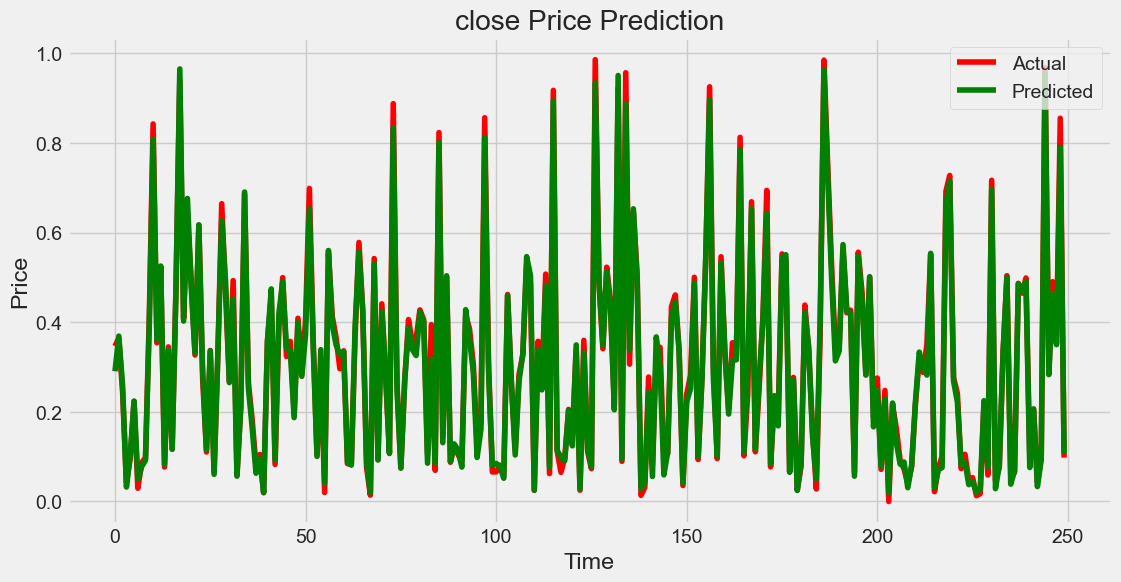

In [102]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Visualize the predictions for 'close'
feature_to_visualize = 'close'
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, df.columns.get_loc(feature_to_visualize)], label='Actual', color='red')
plt.plot(y_pred[:, df.columns.get_loc(feature_to_visualize)], label='Predicted', color='green')
plt.title(f'{feature_to_visualize} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


8/8 [==============================] - 0s 9ms/step
Root Mean Squared Error: 0.04677907775006364


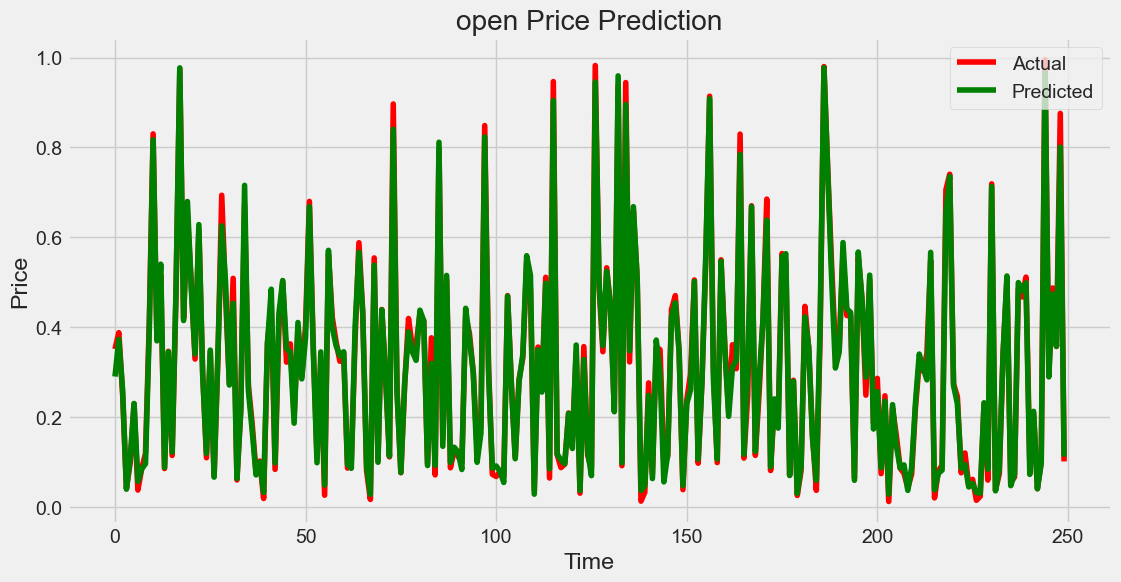

In [103]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Visualize the predictions for Open
feature_to_visualize = 'open'
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, df.columns.get_loc(feature_to_visualize)], label='Actual', color='red')
plt.plot(y_pred[:, df.columns.get_loc(feature_to_visualize)], label='Predicted', color='green')
plt.title(f'{feature_to_visualize} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
